In [1]:
import torch
from PIL import Image
import data.imgs as img_data
import os.path as osp
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
from osgeo import gdal, ogr # https://opensourceoptions.com/blog/how-to-install-gdal-for-python-with-pip-on-windows/

In [2]:
train_data_path = osp.join(osp.dirname(img_data.__file__), "train_features")
train_label_path = osp.join(osp.dirname(img_data.__file__), "train_agbm")

In [3]:
def get_data_from_path(path):
    img_path = osp.join(train_data_path, path)
    dataset = gdal.Open(img_path)
    data = dataset.ReadAsArray()
    return data

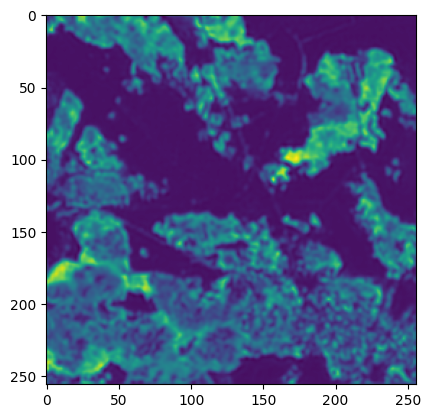

In [4]:
path_temp = r"C:\Users\Team Epoch A\Documents\Epoch III\forestbiomass\data\imgs\test_agbm\00a28320_agbm.tif"
d = get_data_from_path(path_temp)
plt.imshow(d)

(11, 256, 256)


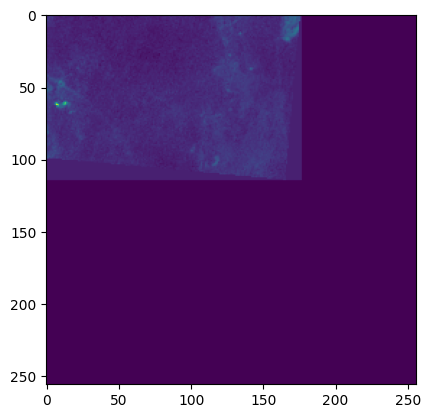

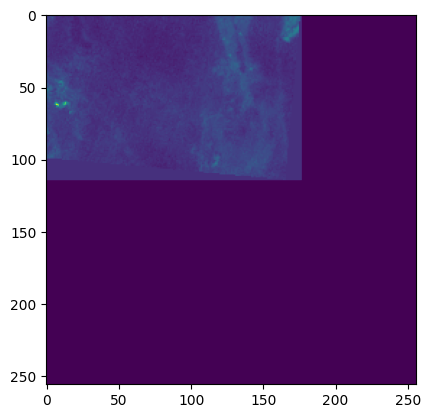

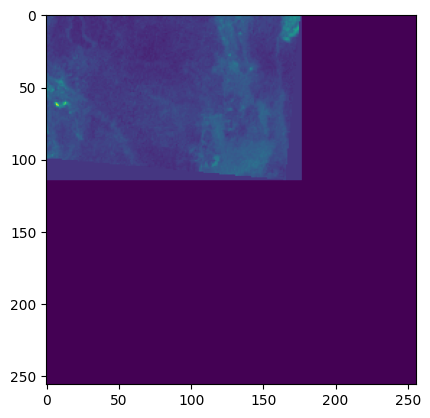

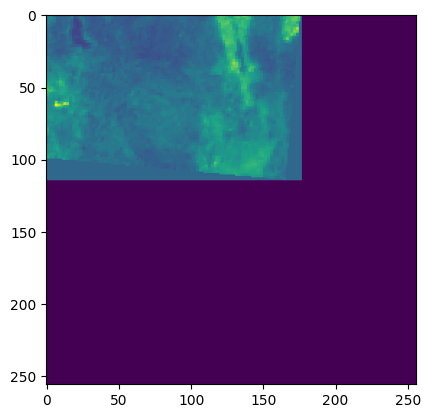

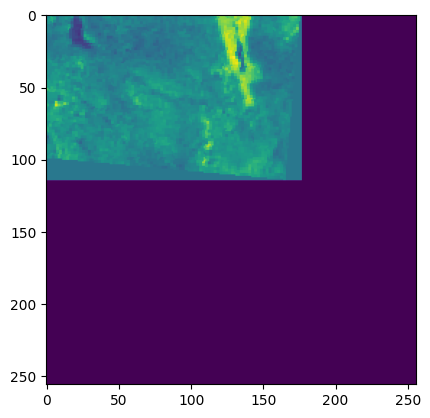

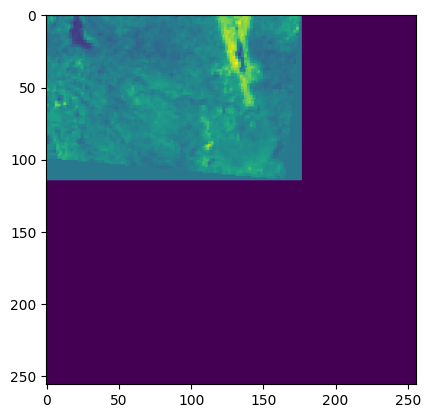

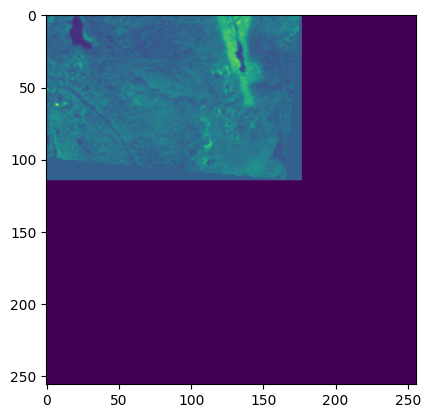

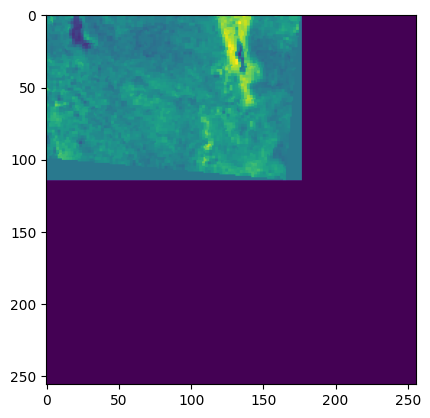

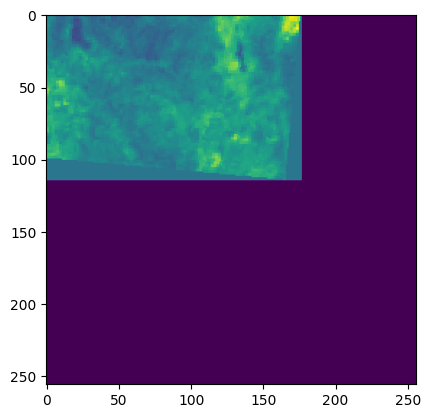

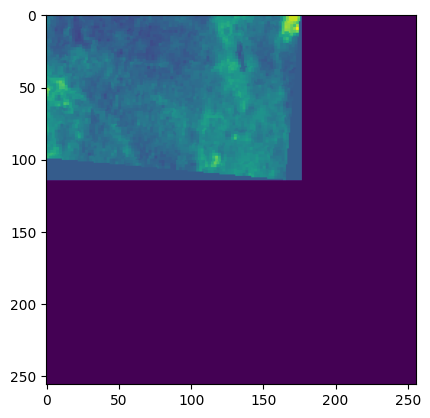

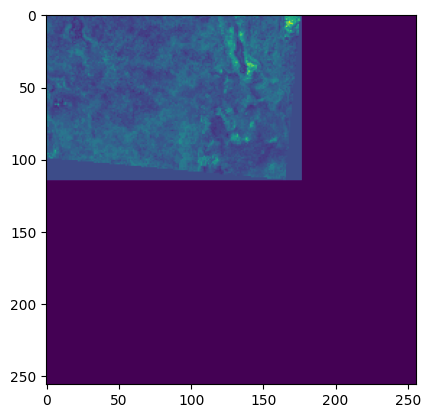

In [5]:

all_imgs = get_data_from_path("3f56d3a1_S2_02.tif") # 0a3d8f03_S2_00.tif
print(all_imgs.shape)
for d in all_imgs:
    plt.imshow(d)
    plt.show()

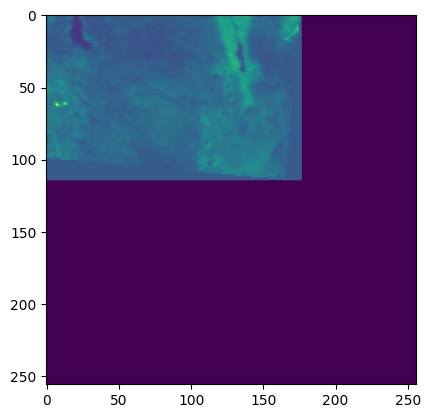

In [6]:
plt.imshow(np.average(all_imgs, axis=0))

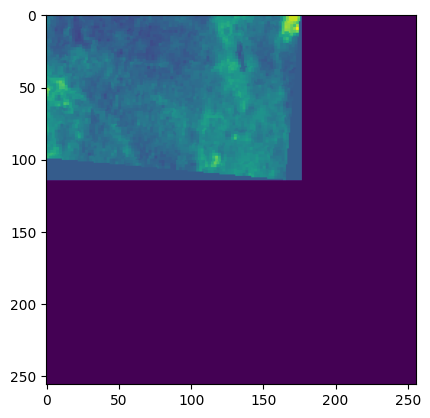

In [7]:
import torch
type(all_imgs[0])
test_image = all_imgs[9]
imshow(test_image)

In [157]:
tensor_image = torch.tensor(np.asarray(test_image, dtype=np.float32))
tensor_image

tensor([[276., 266., 266.,  ...,   0.,   0.,   0.],
        [252., 258., 258.,  ...,   0.,   0.,   0.],
        [252., 258., 258.,  ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.]])

In [158]:
# adapted_image = tensor_image
# adapted_image[adapted_image==0] = 10000
# adapted_image

In [189]:
import torch
from torch.nn import functional as F

def create_mask(image_tensor, radius):
    assert image_tensor.shape == (256, 256), "Input image must be of shape (256, 256)"
    # add singleton dimension
    image_tensor = image_tensor.unsqueeze(0)
    # Create convolution mask
    convolution_mask = F.avg_pool2d(image_tensor, kernel_size=radius*2+1, stride=1, padding=radius)
    # remove singleton dimension
    convolution_mask = convolution_mask.squeeze(0)
    # Create comparison mask
    comparison_mask = torch.where(image_tensor == convolution_mask, torch.tensor(0.), torch.tensor(1.))
    return comparison_mask[0]

In [190]:
tensor_image.shape

torch.Size([256, 256])

tensor(0.3314)

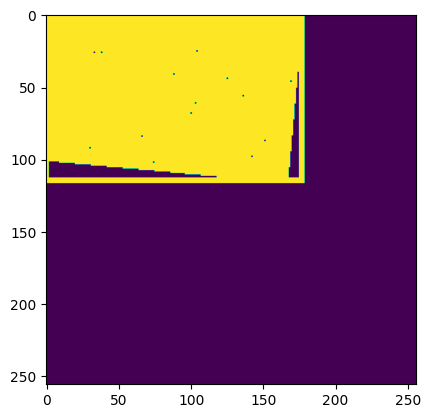

In [193]:
imshow(create_mask(tensor_image, 2))
torch.mean(create_mask(tensor_image, 5))

In [188]:
imshow(create_mask(tensor_image, 1, 2))

TypeError: create_mask() takes 2 positional arguments but 3 were given

In [132]:
imshow(create_mask(tensor_image, 10).detach().numpy())

RuntimeError: shape '[256, 256]' is invalid for input of size 66049

In [88]:
torch.mean(create_mask(tensor_image))

tensor(0.8810, grad_fn=<MeanBackward0>)

In [18]:
test_image = torch.from_numpy(all_imgs[0], dtype=np.float32)

TypeError: torch._VariableFunctionsClass.from_numpy() takes no keyword arguments

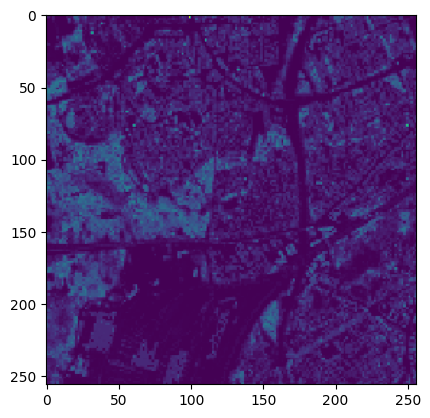

In [15]:
im = Image.open( osp.join(train_label_path, "8bea695a_agbm.tif") )
imshow(np.asarray(im))